In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import re
import copy

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.5.post1 anndata==0.7.1 umap==0.3.9 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [2]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
results_prefix=DATA+'/'+PROTEIN+'/processed_data/A549.'+PROTEIN

FIGS=DATA+'/Figures/'
os.system('mkdir -p '+FIGS+'/Main')
os.system('mkdir -p '+FIGS+'/Supplement')

0

Remove obs that are not relevant
--

In [19]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'TP53_p.Al83Vl', 'TP53_R249M', 'TP53_p.Pro153Pro', 'TP53_H193Y', 'TP53_p.Asp21Asp', 'TP53_H179Y', 'TP53_Y234C', 'TP53_G245V', 'TP53_p.Thr118Thr', 'TP53_G245S', 'TP53_R110L', 'TP53_V173L', 'TP53_E285K', 'TP53_R280T', 'TP53_C277F', 'TP53_p.Tyr107His', 'TP53_P278S', 'TP53_R273L', 'TP53_V272M', 'TP53_P278L', 'TP53_p.Gln5Ar', 'TP53_G105C', 'TP53_R213Q', 'TP53_S241F', 'TP53_R248W', 'TP53_S241C', 'TP53_p.Pro295Pro', 'TP53_R158L', 'TP53_P250L', 'TP53_p.Thr312Ser', 'TP53_S127F', 'TP53_R248L', 'TP53_C141Y', 'TP53_V157F', 'TP53_p.Pro36Pro', 'TP53_C176F', 'TP53_R273H', 'TP53_Y220C', 'TP53_H193R', 'TP53_Y163C', 'TP53_R282W', 'TP53_K132N', 'TP53_R249S', 'TP53_E286K', 'TP53_H193L', 'TP53_A159P', 'TP53_G245C', 'TP53_L194R', 'TP53_p.Pro222Pro', 'TP53_V173M', 'TP53_M246V', 'TP53_G266V', 'TP53_Y205C', 'TP53_P152L', 'TP53_p.Leu344Leu', 'TP53_C238F', 'TP53_R175H', 'TP53_G266E', 'TP53_V216M', 'TP53_R337L', 'TP53_R280K', 'TP53_A159V', 'TP

In [21]:
#del adata.obs['KRAS_K5E']

In [ ]:
del adata.obs['Puro_res']

In [22]:
adata

AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'TP53_p.Al83Vl', 'TP53_R249M', 'TP53_p.Pro153Pro', 'TP53_H193Y', 'TP53_p.Asp21Asp', 'TP53_H179Y', 'TP53_Y234C', 'TP53_G245V', 'TP53_p.Thr118Thr', 'TP53_G245S', 'TP53_R110L', 'TP53_V173L', 'TP53_E285K', 'TP53_R280T', 'TP53_C277F', 'TP53_p.Tyr107His', 'TP53_P278S', 'TP53_R273L', 'TP53_V272M', 'TP53_P278L', 'TP53_p.Gln5Ar', 'TP53_G105C', 'TP53_R213Q', 'TP53_S241F', 'TP53_R248W', 'TP53_S241C', 'TP53_p.Pro295Pro', 'TP53_R158L', 'TP53_P250L', 'TP53_p.Thr312Ser', 'TP53_S127F', 'TP53_R248L', 'TP53_C141Y', 'TP53_V157F', 'TP53_p.Pro36Pro', 'TP53_C176F', 'TP53_R273H', 'TP53_Y220C', 'TP53_H193R', 'TP53_Y163C', 'TP53_R282W', 'TP53_K132N', 'TP53_R249S', 'TP53_E286K', 'TP53_H193L', 'TP53_A159P', 'TP53_G245C', 'TP53_L194R', 'TP53_p.Pro222Pro', 'TP53_V173M', 'TP53_M246V', 'TP53_G266V', 'TP53_Y205C', 'TP53_P152L', 'TP53_p.Leu344Leu', 'TP53_C238F', 'TP53_R175H', 'TP53_G266E', 'TP53_V216M', 'TP53_R337L', 'TP53_R280K', 'TP53_A159V', 'TP

In [23]:
adata.write(results_prefix+'.raw.anno.h5ad')

Annotate variants with the standard variant names
--

In [24]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'TP53_p.Al83Vl', 'TP53_R249M', 'TP53_p.Pro153Pro', 'TP53_H193Y', 'TP53_p.Asp21Asp', 'TP53_H179Y', 'TP53_Y234C', 'TP53_G245V', 'TP53_p.Thr118Thr', 'TP53_G245S', 'TP53_R110L', 'TP53_V173L', 'TP53_E285K', 'TP53_R280T', 'TP53_C277F', 'TP53_p.Tyr107His', 'TP53_P278S', 'TP53_R273L', 'TP53_V272M', 'TP53_P278L', 'TP53_p.Gln5Ar', 'TP53_G105C', 'TP53_R213Q', 'TP53_S241F', 'TP53_R248W', 'TP53_S241C', 'TP53_p.Pro295Pro', 'TP53_R158L', 'TP53_P250L', 'TP53_p.Thr312Ser', 'TP53_S127F', 'TP53_R248L', 'TP53_C141Y', 'TP53_V157F', 'TP53_p.Pro36Pro', 'TP53_C176F', 'TP53_R273H', 'TP53_Y220C', 'TP53_H193R', 'TP53_Y163C', 'TP53_R282W', 'TP53_K132N', 'TP53_R249S', 'TP53_E286K', 'TP53_H193L', 'TP53_A159P', 'TP53_G245C', 'TP53_L194R', 'TP53_p.Pro222Pro', 'TP53_V173M', 'TP53_M246V', 'TP53_G266V', 'TP53_Y205C', 'TP53_P152L', 'TP53_p.Leu344Leu', 'TP53_C238F', 'TP53_R175H', 'TP53_G266E', 'TP53_V216M', 'TP53_R337L', 'TP53_R280K', 'TP53_A159V', 'TP

In [25]:
#annotate with oncokb
ANNO='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/'+PROTEIN+'/anno'

anno_known=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.known.csv',sep='\t')
anno_known.index=anno_known['variant_fullname']
print(anno_known.head())


                 variant_fullname variant_std  position  \
variant_fullname                                          
TP53_R282W             TP53_R282W       R282W       282   
TP53_R273L             TP53_R273L       R273L       273   
TP53_C275F             TP53_C275F       C275F       275   
TP53_Y220C             TP53_Y220C       Y220C       220   
TP53_p.Pro58Ar     TP53_p.Pro58Ar        P58R        58   

                                    known      color  
variant_fullname                                      
TP53_R282W        Likely Loss-of-function  lightblue  
TP53_R273L               Loss-of-function       blue  
TP53_C275F                        unknown       gray  
TP53_Y220C               Loss-of-function       blue  
TP53_p.Pro58Ar                       ExAC       gray  


In [26]:
#annotate group
known=[]
mut_std=[]
for i in range(len(adata.obs_names)):
    g='NA'
    mut=adata.obs['mutant'][i]
    if mut in anno_known.index:
        g=anno_known.loc[mut,'known']
    else:
        if mut=='uninfected' or mut=='multiple':
            g=mut
        else:
            g='unknown'
    known.append(g)
    
    mut_curr='NA'
    if mut in anno_known.index:
        mut_curr=anno_known.loc[mut,'variant_std']
    if g in ['uninfected','multiple']:
        mut_curr=g
    mut_std.append(mut_curr)
adata.obs['known']=known
adata.obs['mut.std']=mut_std

In [27]:
adata.write(results_prefix+'.raw.anno.h5ad')

... storing 'known' as categorical
... storing 'mut.std' as categorical


Ready for filtering
--

In [3]:
adata=sc.read(results_prefix+'.raw.anno.h5ad')
adata

Only considering the two last: ['.anno', '.h5ad'].
Only considering the two last: ['.anno', '.h5ad'].


AnnData object with n_obs × n_vars = 192000 × 33694 
    obs: 'batch', 'TP53_p.Al83Vl', 'TP53_R249M', 'TP53_p.Pro153Pro', 'TP53_H193Y', 'TP53_p.Asp21Asp', 'TP53_H179Y', 'TP53_Y234C', 'TP53_G245V', 'TP53_p.Thr118Thr', 'TP53_G245S', 'TP53_R110L', 'TP53_V173L', 'TP53_E285K', 'TP53_R280T', 'TP53_C277F', 'TP53_p.Tyr107His', 'TP53_P278S', 'TP53_R273L', 'TP53_V272M', 'TP53_P278L', 'TP53_p.Gln5Ar', 'TP53_G105C', 'TP53_R213Q', 'TP53_S241F', 'TP53_R248W', 'TP53_S241C', 'TP53_p.Pro295Pro', 'TP53_R158L', 'TP53_P250L', 'TP53_p.Thr312Ser', 'TP53_S127F', 'TP53_R248L', 'TP53_C141Y', 'TP53_V157F', 'TP53_p.Pro36Pro', 'TP53_C176F', 'TP53_R273H', 'TP53_Y220C', 'TP53_H193R', 'TP53_Y163C', 'TP53_R282W', 'TP53_K132N', 'TP53_R249S', 'TP53_E286K', 'TP53_H193L', 'TP53_A159P', 'TP53_G245C', 'TP53_L194R', 'TP53_p.Pro222Pro', 'TP53_V173M', 'TP53_M246V', 'TP53_G266V', 'TP53_Y205C', 'TP53_P152L', 'TP53_p.Leu344Leu', 'TP53_C238F', 'TP53_R175H', 'TP53_G266E', 'TP53_V216M', 'TP53_R337L', 'TP53_R280K', 'TP53_A159V', 'TP

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 3429 cells that have less than 200 genes expressed
filtered out 8855 genes that are detected in less than 3 cells


In [5]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse to transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

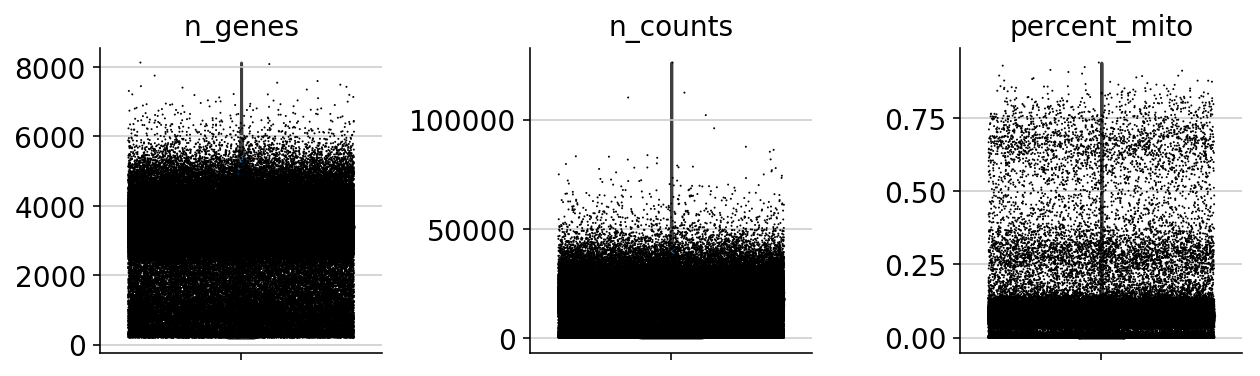

In [6]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True,alpha=0.1)

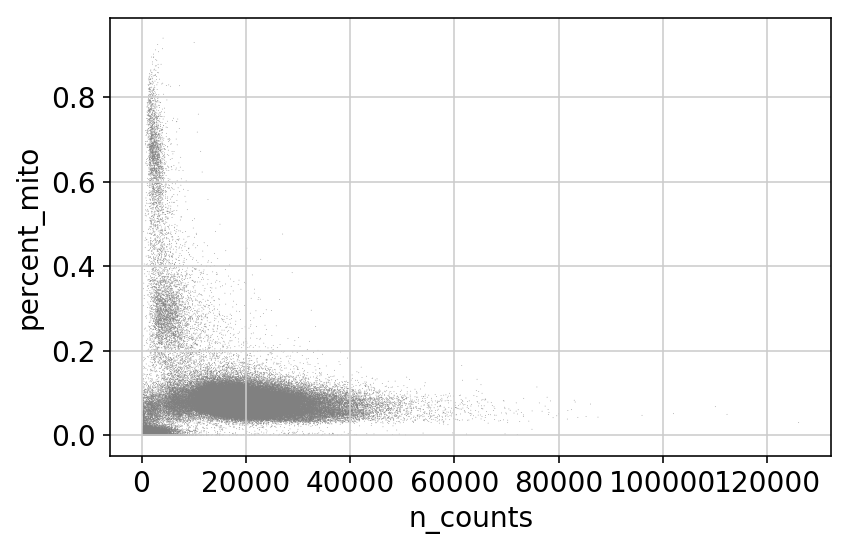

In [7]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')

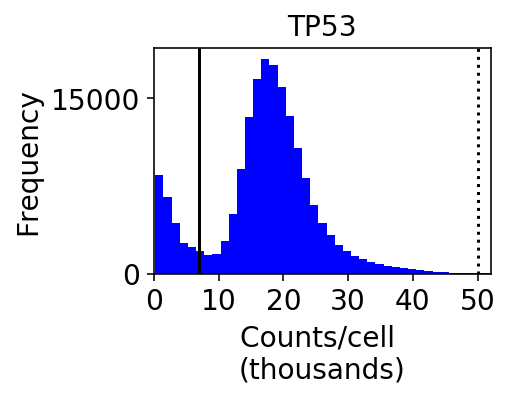

In [8]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='blue')
plots.set_xticks([0,10,20,30,40,50])
plots.set_yticks([0,15000])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title(PROTEIN)
plots.axvline(x=7,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_hist.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_hist.png',bbox_inches = "tight") 

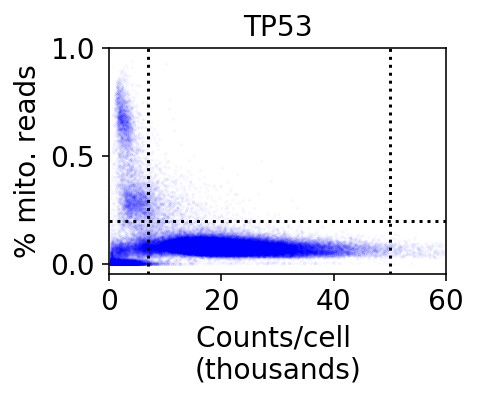

In [11]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.scatter(adata.obs['n_counts']/1000,adata.obs['percent_mito'],
             color='blue',s=0.1,alpha=0.05)
plots.set_yticks([0,0.5,1])

#plots.set_yticks([0,0.1,0.2,0.3])
plots.set_xlim(0,60)
#plots.set_xticklabels(['0','5','>10'])
plots.set_ylabel('% mito. reads')
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_title(PROTEIN)
plots.axhline(y=0.2,linestyle='dotted',color='black')
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')

plots.grid(False)
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_vs_mito.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_vs_mito.png',bbox_inches = "tight")

In [35]:
#let's downsample to 50k
sc.pp.downsample_counts(adata, counts_per_cell=50000)

In [36]:
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

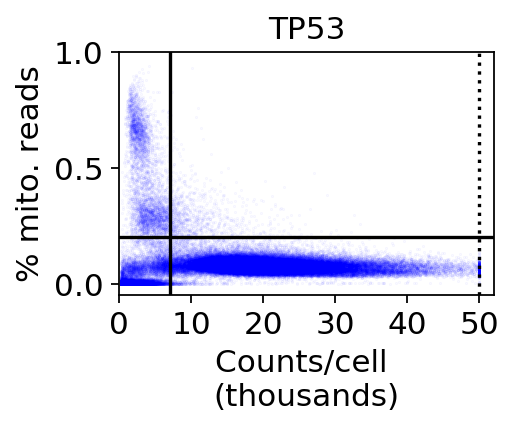

In [37]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.scatter(adata.obs['n_counts']/1000,adata.obs['percent_mito'],
             color='blue',s=0.1,alpha=0.05)
plots.set_yticks([0,0.5,1])

plots.set_xlim(0,52)
plots.set_xticks([0,10,20,30,40,50])
plots.set_ylabel('% mito. reads')
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_title(PROTEIN)
plots.axhline(y=0.2,color='black')
plots.axvline(x=7,color='black')
plots.axvline(x=50,linestyle='dotted',color='black')

plots.grid(False)
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_vs_mito_after_downsampling.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_vs_mito_after_downsampling.png',bbox_inches = "tight")

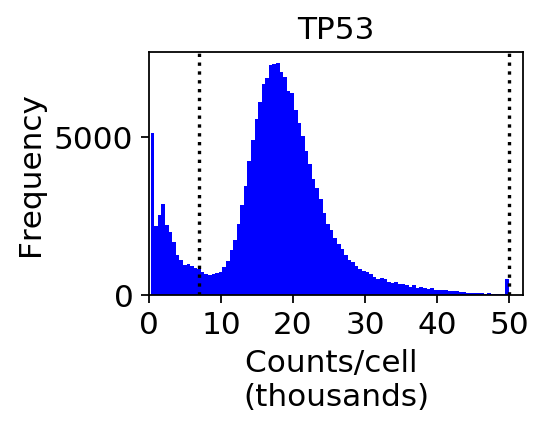

In [38]:
fw=3
fh=2

fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)
plots.hist(adata.obs['n_counts']/1000,100,
         color='blue')
plots.set_xticks([0,10,20,30,40,50])
plots.set_xlim(0,52)
plots.set_xlabel('Counts/cell \n(thousands)')
plots.set_ylabel('Frequency')
plots.set_title(PROTEIN)
plots.axvline(x=7,linestyle='dotted',color='black')
plots.axvline(x=50,linestyle='dotted',color='black')
plots.grid(False)

plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_hist_after_downsampling.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/Supplement/'+PROTEIN+'.Counts_hist_after_downsampling.png',bbox_inches = "tight") 

In [39]:
adata = adata[adata.obs['n_counts'] > 7000, :]
adata = adata[adata.obs['n_counts'] <= 50000, :]
adata = adata[adata.obs['percent_mito'] < 0.2, :]
print(adata)

View of AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'batch', 'TP53_p.Al83Vl', 'TP53_R249M', 'TP53_p.Pro153Pro', 'TP53_H193Y', 'TP53_p.Asp21Asp', 'TP53_H179Y', 'TP53_Y234C', 'TP53_G245V', 'TP53_p.Thr118Thr', 'TP53_G245S', 'TP53_R110L', 'TP53_V173L', 'TP53_E285K', 'TP53_R280T', 'TP53_C277F', 'TP53_p.Tyr107His', 'TP53_P278S', 'TP53_R273L', 'TP53_V272M', 'TP53_P278L', 'TP53_p.Gln5Ar', 'TP53_G105C', 'TP53_R213Q', 'TP53_S241F', 'TP53_R248W', 'TP53_S241C', 'TP53_p.Pro295Pro', 'TP53_R158L', 'TP53_P250L', 'TP53_p.Thr312Ser', 'TP53_S127F', 'TP53_R248L', 'TP53_C141Y', 'TP53_V157F', 'TP53_p.Pro36Pro', 'TP53_C176F', 'TP53_R273H', 'TP53_Y220C', 'TP53_H193R', 'TP53_Y163C', 'TP53_R282W', 'TP53_K132N', 'TP53_R249S', 'TP53_E286K', 'TP53_H193L', 'TP53_A159P', 'TP53_G245C', 'TP53_L194R', 'TP53_p.Pro222Pro', 'TP53_V173M', 'TP53_M246V', 'TP53_G266V', 'TP53_Y205C', 'TP53_P152L', 'TP53_p.Leu344Leu', 'TP53_C238F', 'TP53_R175H', 'TP53_G266E', 'TP53_V216M', 'TP53_R337L', 'TP53_R280K', 'TP53_A15

In [40]:
adata.write(results_prefix+'.raw.filt.anno.h5ad')